# Homework2

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstnme_Lastname_12345678_COMP47350_Homework2.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please!

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    - .txt
    - .html
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, April 16, 2017, midnight.** 

## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. We first need to understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product. Our goal is to work with the data to build and evaluate prediction models that capture the relationship between descriptive features and the target feature 'IsWinner'.

We use the same dataset from Homework1 (you can use your cleaned/prepared CSV or the raw dataset), a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [25] Data Understanding: Exploring relationships between feature pairs:
    - (1.1) [5] Print the correlations between the continuous features.
    - (1.2) [5] Plot the scatter plots of each pair of continuous descriptive feature and target feature.
    - (1.3) [5] Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices.
    - (1.4) [5] For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots).
    - (1.5) [5] Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices.
    
(2). [15] Predictive Modeling: Linear Regression  
    - (2.1) [5] Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (2.2) [2.5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (2.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (2.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 to get the predicted class for each example. 

(3). [15] Predictive Modeling: Logistic Regression  
    - (3.1) [5] Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (3.2) [5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (3.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (3.4) [2.5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(4). [20] Predictive Modeling: Random Forest 
    - (4.1) [5] Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (4.2) [5] Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising.
    - (4.3) [5] Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set.
    - (4.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(5). [25] Evaluating Predictive Models
    - (5.1) [10] Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.
    - (5.2) [15] Summarize and try to improve your results so far:
        - (5.2.1) [5] Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers.
        - (5.2.2) [10] Discuss your understanding of the problem and predictive modeling results so far. Can you find any tricks to improve the best model so far (e.g., using feature significance, feature re-scaling, creating new features, combining models, or other knowledge)?

In [279]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('ggplot')
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
#for showing plots directly in the notebook
%matplotlib inline

In [280]:
df = pd.read_csv('C:/Users/pamel/Anaconda3/envs/DataAnalytics/workspace/Data_Analytics_Homework2/amazon-offers-10k-samples-new2.csv', encoding = "ISO-8859-1")

In [281]:
#test that we have the data
df.head()
#utf-8 encoding throwing an error - have I made some unwanted change to the csv as the old file still reads fine? 
#using ISO-8859-1 introduces a new 'unnamed' column?

Unnamed: 0  IsWinner     ProductId         TimeOfOfferChange  \
0           1         1 -4.885260e+18  2016-02-04T04:26:52.136Z   
1           2         0 -4.885260e+18  2016-02-04T04:26:52.136Z   
2           3         0 -4.885260e+18  2016-02-04T04:26:52.136Z   
3           4         0 -4.885260e+18  2016-02-04T04:26:52.136Z   
4           5         0 -4.885260e+18  2016-02-04T04:26:52.136Z   

                                      ConditionNotes  IsFeaturedMerchant  \
0  Ready To Ship - We are unable to ship to PO Bo...                   1   
1                                                  .                   1   
2                           Fast shipping in Canada.                   1   
3                                                NaN                   0   
4                                                NaN                   0   

   IsFulfilledByAmazon  ListingPrice  SellerFeedbackRating  \
0                    0        107.35                    95   
1                    0        100.46                    98   
2                    0         99.24                    95   
3                    0        109.48                    94   
4                    0        116.70                    67   

   SellerFeedbackCount      SellerId  ShippingPrice  ShippingTime_minHours  \
0                 4078 -1.789490e+18           0.00                     48   
1                  478  5.452080e+18           6.99                     24   
2                 4384 -2.572280e+18          11.67                     24   
3                  105 -8.704030e+18           8.99                     24   
4                    9  1.929050e+18           6.98                     24   

   ShippingTime_maxHours ShipsFromCountry ShipsFromState  
0                     72               CA             ON  
1                     48               CA             ON  
2                     48               CA             ON  
3                     48               CA             ON  
4                     48               CA             AB

### Tidying Up the Data

For the purposes of this assignment, I won't be using certain columns, so I'm going to drop those now. 

In [282]:
df.dtypes

Unnamed: 0                 int64
IsWinner                   int64
ProductId                float64
TimeOfOfferChange         object
ConditionNotes            object
IsFeaturedMerchant         int64
IsFulfilledByAmazon        int64
ListingPrice             float64
SellerFeedbackRating       int64
SellerFeedbackCount        int64
SellerId                 float64
ShippingPrice            float64
ShippingTime_minHours      int64
ShippingTime_maxHours      int64
ShipsFromCountry          object
ShipsFromState            object
dtype: object

In [283]:
df.IsFulfilledByAmazon.unique()

array([0], dtype=int64)

In [284]:
df.drop(df.columns[[0, 2, 3, 4, 6, 10]], axis = 1, inplace = True)

In [285]:
df.head()

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
0         1                   1        107.35                    95   
1         0                   1        100.46                    98   
2         0                   1         99.24                    95   
3         0                   0        109.48                    94   
4         0                   0        116.70                    67   

   SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
0                 4078           0.00                     48   
1                  478           6.99                     24   
2                 4384          11.67                     24   
3                  105           8.99                     24   
4                    9           6.98                     24   

   ShippingTime_maxHours ShipsFromCountry ShipsFromState  
0                     72               CA             ON  
1                     48               CA             ON  
2                     48               CA             ON  
3                     48               CA             ON  
4                     48               CA             AB

In [286]:
df.dtypes

IsWinner                   int64
IsFeaturedMerchant         int64
ListingPrice             float64
SellerFeedbackRating       int64
SellerFeedbackCount        int64
ShippingPrice            float64
ShippingTime_minHours      int64
ShippingTime_maxHours      int64
ShipsFromCountry          object
ShipsFromState            object
dtype: object

In [287]:
df.isnull().sum()

IsWinner                 0
IsFeaturedMerchant       0
ListingPrice             0
SellerFeedbackRating     0
SellerFeedbackCount      0
ShippingPrice            0
ShippingTime_minHours    0
ShippingTime_maxHours    0
ShipsFromCountry         0
ShipsFromState           0
dtype: int64

In [288]:
#outliers in Listing Price
df.sort_values(by='ListingPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
2865         0                   1       2999.00                    95   
73           0                   1       2999.00                    95   
2684         0                   0       2617.92                    96   
2683         0                   1       2237.85                    93   
2290         0                   0       2093.77                    98   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
2865                 4385          12.52                     24   
73                   4384          12.12                     24   
2684                 1790           9.98                     96   
2683                 2521         269.65                     24   
2290                 1446           0.00                     24   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
2865                     48               CA             ON  
73                       48               CA             ON  
2684                    120               US             NY  
2683                     48               US             VA  
2290                     48               US             CA

In [289]:
#outliers in Seller Feedback Rating
df.sort_values(by='SellerFeedbackRating', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
4201         0                   1        105.81                   100   
1567         0                   1         55.98                   100   
4340         0                   1        444.53                   100   
2830         0                   1         99.61                   100   
3439         0                   0         92.75                   100   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
4201                  384          13.08                     24   
1567                  384          13.86                     24   
4340                  384          20.26                     24   
2830                 4601           0.00                     24   
3439                  384          13.09                     24   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
4201                     48               CA             ON  
1567                     48               CA             ON  
4340                     48               CA             ON  
2830                     48               CA             ON  
3439                     48               CA             ON

In [290]:
#outliers in Shipping Price
df.sort_values(by='ShippingPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
531          0                   1        929.02                    93   
2137         0                   1        929.02                    93   
4251         0                   1        929.02                    93   
2683         0                   1       2237.85                    93   
764          0                   1        575.25                    93   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
531                  2521         335.35                     24   
2137                 2521         335.35                     24   
4251                 2521         335.35                     24   
2683                 2521         269.65                     24   
764                  2521         252.25                     24   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
531                      48               US             VA  
2137                     48               US             VA  
4251                     48               US             VA  
2683                     48               US             VA  
764                      48               US             VA

# Question 1. Data Understanding: Exploring Relationships Between Feature Pairs

## 1.1 Print the correlations between the continuous features

In [291]:
sns.set(style='white')
continuous_columns = df[['SellerFeedbackRating', 'SellerFeedbackCount', 'ListingPrice', 'ShippingPrice', 'ShippingTime_minHours', 'ShippingTime_maxHours']].columns
corr = df[continuous_columns].corr()

print(corr)

                       SellerFeedbackRating  SellerFeedbackCount  \
SellerFeedbackRating               1.000000             0.105576   
SellerFeedbackCount                0.105576             1.000000   
ListingPrice                      -0.037842            -0.001166   
ShippingPrice                     -0.005308            -0.202074   
ShippingTime_minHours             -0.163926             0.295287   
ShippingTime_maxHours             -0.176798             0.212978   

                       ListingPrice  ShippingPrice  ShippingTime_minHours  \
SellerFeedbackRating      -0.037842      -0.005308              -0.163926   
SellerFeedbackCount       -0.001166      -0.202074               0.295287   
ListingPrice               1.000000       0.215024               0.038674   
ShippingPrice              0.215024       1.000000              -0.016701   
ShippingTime_minHours      0.038674      -0.016701               1.000000   
ShippingTime_maxHours      0.032914       0.036349           

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

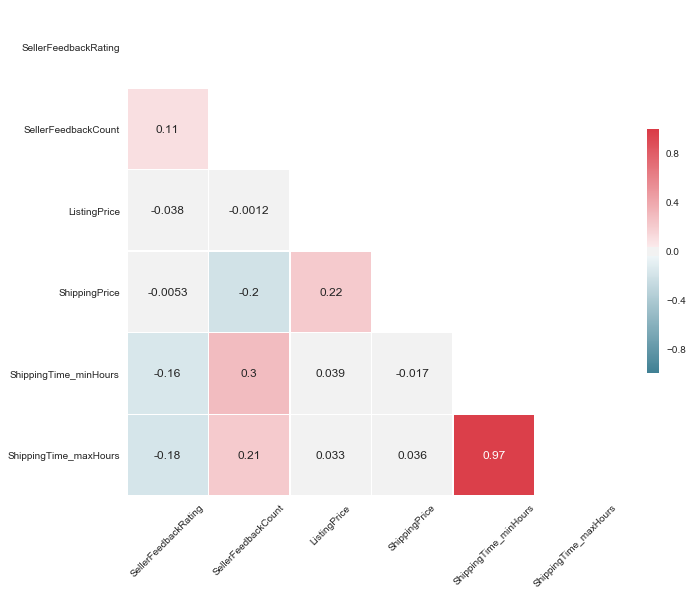

In [292]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

## 1.2 Plot the scatter plots of each pair of continuous descriptive feature and target feature

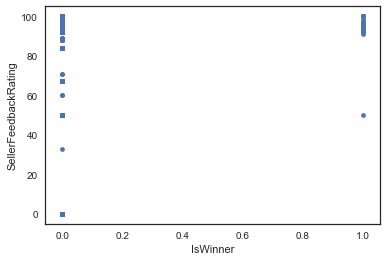

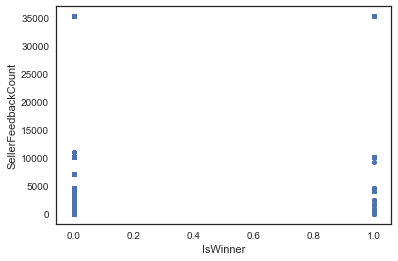

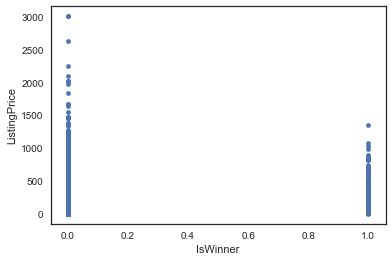

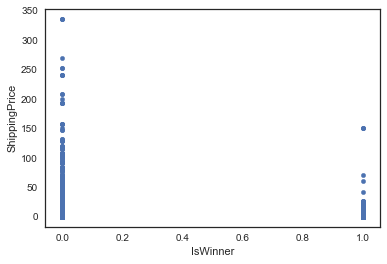

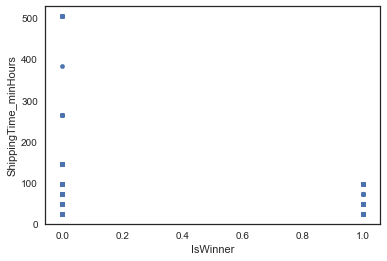

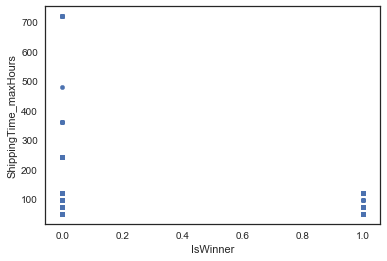

In [293]:
% matplotlib inline
df.plot(kind='scatter', x='IsWinner', y='SellerFeedbackRating')
df.plot(kind='scatter', x='IsWinner', y='SellerFeedbackCount')
df.plot(kind='scatter', x='IsWinner', y='ListingPrice')
df.plot(kind='scatter', x='IsWinner', y='ShippingPrice')
df.plot(kind='scatter', x='IsWinner', y='ShippingTime_minHours')
df.plot(kind='scatter', x='IsWinner', y='ShippingTime_maxHours')

## 1.3 Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices. 

1. Seller Feedback Rating looks promising - from the scatter plot we can see that there is a correlation between sellers with ratings above 80 and the target feature. While we can see that it isn't conclusive that the offer would be in the positive class based solely on this, it could act as a way to reduce the probability of an offer being in the positive class - if the seller rating is below the threshold.
2. We can see a similar pattern in regard to Listing Price. There are no cases in the positive class above the Listing Price of 1500 dollars - this is something we could look at further. 
3. Shipping Price is similar to Listing Price. There are no positive cases above 100 dollars except one instance which could be an outlier. This is something that we could look at further also.

Need to create dummies for ships from state for linear and logistic regression. 

## 1.4 For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots). 

In [294]:
%matplotlib inline

#define our categorical features
categorical_features = ['IsFeaturedMerchant',
                        'ShipsFromCountry', 'ShipsFromState']

categorical_columns = df[categorical_features].columns


(0, 100)

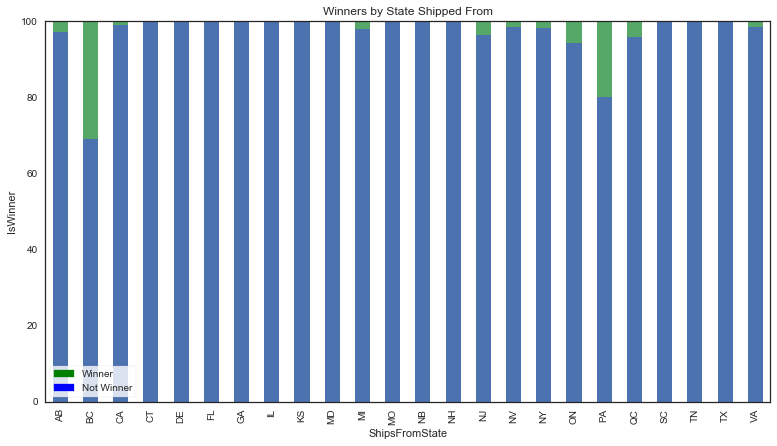

In [295]:
# Find unique values in ShipsFromState

states = pd.unique(df.ShipsFromState.ravel())

# Insert a new column called 'percent' and fill it with 0s
df['percent'] = 0

# Iterate through the unique values in State and for each value count the amount of winners
# Find the indexes of each row with a particular state and for each of these row insert count * 100 in the percent column
for s in states:
    count = 1 / df[df.ShipsFromState == s].count()['IsWinner']
    index_list = df[df['ShipsFromState'] == s].index.tolist()
    for i in index_list:
        df.loc[i, 'percent'] = count * 100


category_group = df[['percent', 'ShipsFromState','IsWinner']].groupby(['ShipsFromState','IsWinner']).sum()

my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by State Shipped From", figsize=(13,7))

red_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("ShipsFromState")
my_plot.set_ylabel("IsWinner")
my_plot.set_ylim([0,100])


(0, 100)

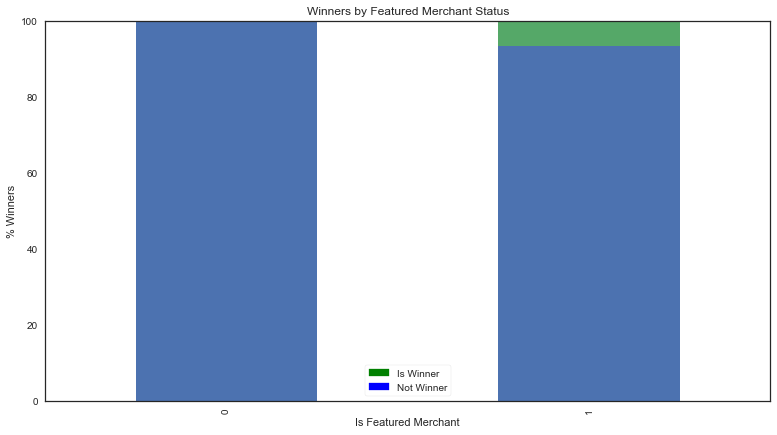

In [296]:
# Count the number of female candidates
featured = 1 / df[df.IsFeaturedMerchant == 1].count()['IsFeaturedMerchant']

# Counts the number of male candidates
not_featured = 1 / df[df.IsFeaturedMerchant == 0].count()['IsFeaturedMerchant']

# Create a new column in the dataframe called percent and insert male_count in all cells
df['percent'] = not_featured * 100

# Find indexes of all rows containing value Female for Gender
index_list = df[df['IsFeaturedMerchant'] == 1].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = featured * 100

# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','IsFeaturedMerchant','IsWinner']].groupby(['IsFeaturedMerchant','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by Featured Merchant Status", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Is Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("Is Featured Merchant")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

#by looking at this - we cannot confidently say that if a product is a featured merchant that it will be a winning offer 
#but we can say that if it is not a featured merchant it definitely won't be a winning offer

(0, 100)

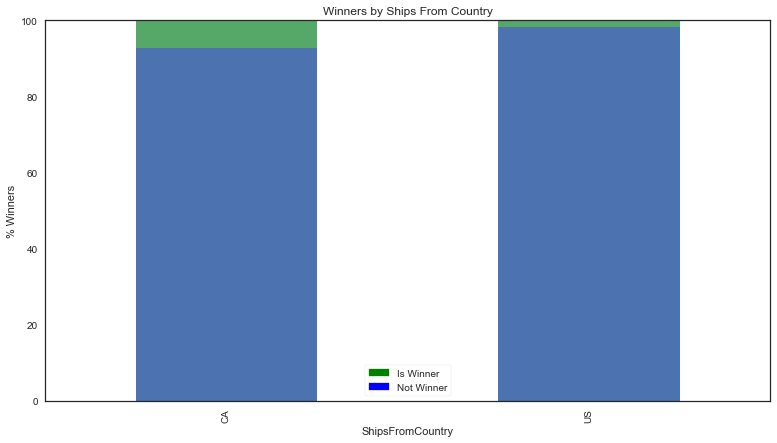

In [297]:
# Count the number of female candidates
count_CA = 1 / df[df.ShipsFromCountry == 'CA'].count()['ShipsFromCountry']

# Counts the number of male candidates
count_US = 1 / df[df.ShipsFromCountry == 'US'].count()['ShipsFromCountry']

# Create a new column in the dataframe called percent and insert male_count in all cells
df['percent'] = count_US * 100

# Find indexes of all rows containing value Female for Gender
index_list = df[df['ShipsFromCountry'] == 'CA'].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = count_CA * 100

# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','ShipsFromCountry','IsWinner']].groupby(['ShipsFromCountry','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by Ships From Country", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Is Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("ShipsFromCountry")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

## 1.5 Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices. 

1. Ships From State seems to be the most informative - there are a high number of winners from BC and PA. 
2. Is Featured Merchant gives some indication - there are no winners in instances where the offer is not a featured merchant.
3. There are a higher percentage of winners respectively in the offers shipped from Canada than the US. 

## Data Preparation

Before we go ahead and train the models, we need to do something with the categorical features - so we will create dummies for them and treat them as individual features. 

We also need to drop the features we have decided not to include as part of our model. 

In [298]:
df.dtypes

IsWinner                   int64
IsFeaturedMerchant         int64
ListingPrice             float64
SellerFeedbackRating       int64
SellerFeedbackCount        int64
ShippingPrice            float64
ShippingTime_minHours      int64
ShippingTime_maxHours      int64
ShipsFromCountry          object
ShipsFromState            object
percent                  float64
dtype: object

In [299]:
df.drop(df.columns[[4, 6, 7, 10]], axis = 1, inplace = True)

In [300]:
ShipsFromState_dummies = pd.get_dummies(df.ShipsFromState, prefix='ShipsFrom').iloc[:, :]
df = pd.concat([df, ShipsFromState_dummies], axis=1)
#I know that we would normally not use the first dummy but I wasn't sure whether that was the case in a complex feature like this

In [301]:
ShipsFromCountry_dummies = pd.get_dummies(df.ShipsFromCountry, prefix ='ShipsFromCountry').iloc[:, :]
df = pd.concat([df, ShipsFromCountry_dummies], axis = 1)

In [302]:
#and now we'll drop the columns for ShipsFromState and ShipsFromCountry - and for the states that have not shown to be of interest
#in our stacked bar plot
df.columns

Index(['IsWinner', 'IsFeaturedMerchant', 'ListingPrice',
       'SellerFeedbackRating', 'ShippingPrice', 'ShipsFromCountry',
       'ShipsFromState', 'ShipsFrom_AB', 'ShipsFrom_BC', 'ShipsFrom_CA',
       'ShipsFrom_CT', 'ShipsFrom_DE', 'ShipsFrom_FL', 'ShipsFrom_GA',
       'ShipsFrom_IL', 'ShipsFrom_KS', 'ShipsFrom_MD', 'ShipsFrom_MI',
       'ShipsFrom_MO', 'ShipsFrom_NB', 'ShipsFrom_NH', 'ShipsFrom_NJ',
       'ShipsFrom_NV', 'ShipsFrom_NY', 'ShipsFrom_ON', 'ShipsFrom_PA',
       'ShipsFrom_QC', 'ShipsFrom_SC', 'ShipsFrom_TN', 'ShipsFrom_TX',
       'ShipsFrom_VA', 'ShipsFromCountry_CA', 'ShipsFromCountry_US'],
      dtype='object')

In [303]:
#now we can drop ShipsFromState and ShipsFromCountry
df.drop(df.columns[[5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27, 28, 29, 30]], axis = 1, inplace = True)

In [304]:
df.columns

Index(['IsWinner', 'IsFeaturedMerchant', 'ListingPrice',
       'SellerFeedbackRating', 'ShippingPrice', 'ShipsFrom_AB', 'ShipsFrom_BC',
       'ShipsFrom_ON', 'ShipsFrom_PA', 'ShipsFrom_QC', 'ShipsFromCountry_CA',
       'ShipsFromCountry_US'],
      dtype='object')

# Question 2: Predictive Modeling: Linear Regression

## 2.1 Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [428]:
import statsmodels
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

feature_cols = ['IsFeaturedMerchant', 'ListingPrice', 'SellerFeedbackRating', 'ShippingPrice', 'ShipsFrom_BC', 
                'ShipsFrom_ON', 'ShipsFrom_PA', 'ShipsFrom_QC', 'ShipsFromCountry_CA', 'ShipsFromCountry_US']

#create x and y
X = df[feature_cols]
y = df.IsWinner

#lm = LinearRegression()
#lm.fit(X, y)

form_features = ""

for i in range(len(feature_cols) - 1):
    form_features += feature_cols[i] + " + "

form_features += feature_cols[len(feature_cols) - 1]

lm = sm.ols(formula = "IsWinner ~ " + form_features, data = df).fit()

## Evaluate the quality of the model on the training set

In [429]:
lm_predictions = lm.predict(X[feature_cols])
df_true_vs_lm_predicted = pd.DataFrame({'ActualClass': y, 'PredictedClass': lm_predictions})
df_true_vs_lm_predicted

ActualClass  PredictedClass
0               1        0.072131
1               0        0.070188
2               0        0.069770
3               0        0.015996
4               0        0.026352
5               0        0.071484
6               0        0.028024
7               0        0.028037
8               0        0.052293
9               0        0.069630
10              0        0.030522
11              0        0.049693
12              0       -0.027558
13              1        0.051802
14              0        0.027588
15              0        0.027600
16              0        0.025733
17              0        0.069688
18              0        0.025013
19              0        0.029840
20              0        0.027313
21              0        0.051554
22              0        0.025438
23              0        0.024560
24              0        0.029634
25              1        0.307644
26              0        0.067990
27              0        0.069146
28              0        0.052272
29              0        0.024417
...           ...             ...
5821            0        0.055099
5822            0       -0.021798
5823            0        0.071642
5824            0        0.052014
5825            0        0.033560
5826            1        0.069370
5827            0       -0.027185
5828            0        0.017112
5829            0        0.051565
5830            0        0.027337
5831            0        0.029738
5832            0        0.070870
5833            0        0.027353
5834            0        0.068188
5835            0        0.069580
5836            0        0.025681
5837            0        0.029788
5838            0        0.021174
5839            0        0.069370
5840            0       -0.027185
5841            0        0.017112
5842            0        0.051565
5843            0        0.027337
5844            0        0.029738
5845            0        0.070870
5846            0        0.027353
5847            0        0.068188
5848            0        0.069580
5849            0        0.025681
5850            0        0.029788

[5851 rows x 2 columns]

In [430]:
for index, row in df_true_vs_lm_predicted.iterrows():
    if np.any(df_true_vs_lm_predicted["PredictedClass"] > 5):
        df_true_vs_lm_predicted["PredictedClass"] = int(1)
    else:
        df_true_vs_lm_predicted["PredictedClass"] = int(0)

df_true_vs_lm_predicted

ActualClass  PredictedClass
0               1               0
1               0               0
2               0               0
3               0               0
4               0               0
5               0               0
6               0               0
7               0               0
8               0               0
9               0               0
10              0               0
11              0               0
12              0               0
13              1               0
14              0               0
15              0               0
16              0               0
17              0               0
18              0               0
19              0               0
20              0               0
21              0               0
22              0               0
23              0               0
24              0               0
25              1               0
26              0               0
27              0               0
28              0               0
29              0               0
...           ...             ...
5821            0               0
5822            0               0
5823            0               0
5824            0               0
5825            0               0
5826            1               0
5827            0               0
5828            0               0
5829            0               0
5830            0               0
5831            0               0
5832            0               0
5833            0               0
5834            0               0
5835            0               0
5836            0               0
5837            0               0
5838            0               0
5839            0               0
5840            0               0
5841            0               0
5842            0               0
5843            0               0
5844            0               0
5845            0               0
5846            0               0
5847            0               0
5848            0               0
5849            0               0
5850            0               0

[5851 rows x 2 columns]

In [433]:
accuracy = metrics.accuracy_score(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"], normalize = False)
confusion_matrix = metrics.confusion_matrix(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [434]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  5547
Confusion matrix: 
 [[5547    0]
 [ 304    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      5547
          1       0.00      0.00      0.00       304

avg / total       0.90      0.95      0.92      5851



### This is very bad - my model is predicting only negatives. 

## 2.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model. 

In [435]:
# Print the intercept and coefficients
lm.params

Intercept               0.009301
IsFeaturedMerchant      0.054580
ListingPrice            0.000011
SellerFeedbackRating   -0.000169
ShippingPrice          -0.000194
ShipsFrom_BC            0.232170
ShipsFrom_ON           -0.005332
ShipsFrom_PA            0.205798
ShipsFrom_QC           -0.025293
ShipsFromCountry_CA     0.028387
ShipsFromCountry_US    -0.019086
dtype: float64

In [436]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               IsWinner   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     63.67
Date:                Thu, 13 Apr 2017   Prob (F-statistic):          4.98e-112
Time:                        19:30:27   Log-Likelihood:                 779.37
No. Observations:                5851   AIC:                            -1539.
Df Residuals:                    5841   BIC:                            -1472.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0093      0.017      0.541      0.588        -0.024     0.043
IsFeaturedMerchant       0.0546      0.007      7.697      0.000         0.041     0.068
ListingPrice          1.129e-05   1.14e-05      0.991      0.322      -1.1e-05  3.36e-05
SellerFeedbackRating    -0.0002      0.000     -0.699      0.484        -0.001     0.000
ShippingPrice           -0.0002      0.000     -1.310      0.190        -0.000  9.66e-05
ShipsFrom_BC             0.2322      0.038      6.134      0.000         0.158     0.306
ShipsFrom_ON            -0.0053      0.036     -0.149      0.882        -0.076     0.065
ShipsFrom_PA             0.2058      0.096      2.135      0.033         0.017     0.395
ShipsFrom_QC            -0.0253      0.036     -0.697      0.486        -0.096     0.046
ShipsFromCountry_CA      0.0284      0.024      1.199      0.231        -0.018     0.075
ShipsFromCountry_US     -0.0191      0.015     -1.258      0.209        -0.049     0.011
==============================================================================
Omnibus:                     4296.609   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53523.317
Skew:                           3.581   Prob(JB):                         0.00
Kurtosis:                      15.971   Cond. No.                     2.32e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Statistical Significance:

1. From the above we can see that the most valuable features are Listing Price, while the other positively significant features are Featured Merchant, Ships From BC, Ships From PA and SHips From Country CA. 

2. The others are all in the negative meaning that an increase in those features does not equate to an increase in the likelyhood of an offer becoming a winner.  

Reference for interpreting coefficients: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

Evalutation: Only Ships From British Columbia has a P value or below 0.05??? Doesn't leave me very much to work with. 
R-squared is very low meaning that the model does not fit the data well? 

## 2.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quailty of the model on the training set. 

In [437]:
#how to separate the states that are pertinent? 

lm_2 = sm.ols(formula="IsWinner ~ ListingPrice + IsFeaturedMerchant + ShipsFrom_BC + ShipsFrom_PA + ShipsFromCountry_CA", data=df).fit()


In [438]:
lm_predictions = lm_2.predict(X[feature_cols])
df_true_vs_lm_predicted = pd.DataFrame({'ActualClass': y, 'PredictedClass': lm_predictions})
df_true_vs_lm_predicted

ActualClass  PredictedClass
0               1        0.063645
1               0        0.063599
2               0        0.063591
3               0        0.011670
4               0        0.011718
5               0        0.063761
6               0        0.026936
7               0        0.026944
8               0        0.063817
9               0        0.063754
10              0        0.027066
11              0        0.063804
12              0       -0.025330
13              1        0.063526
14              0        0.026678
15              0        0.026685
16              0        0.026628
17              0        0.063500
18              0        0.026796
19              0        0.027061
20              0        0.026515
21              0        0.063380
22              0        0.026482
23              0        0.026697
24              0        0.026939
25              1        0.308679
26              0        0.063617
27              0        0.063666
28              0        0.063805
29              0        0.026902
...           ...             ...
5821            0        0.065477
5822            0       -0.023187
5823            0        0.065521
5824            0        0.065576
5825            0        0.029262
5826            1        0.063302
5827            0       -0.025455
5828            0        0.011333
5829            0        0.063387
5830            0        0.026529
5831            0        0.026602
5832            0        0.063397
5833            0        0.026539
5834            0        0.063334
5835            0        0.063380
5836            0        0.026547
5837            0        0.027030
5838            0        0.026872
5839            0        0.063302
5840            0       -0.025455
5841            0        0.011333
5842            0        0.063387
5843            0        0.026529
5844            0        0.026602
5845            0        0.063397
5846            0        0.026539
5847            0        0.063334
5848            0        0.063380
5849            0        0.026547
5850            0        0.027030

[5851 rows x 2 columns]

In [439]:
for index, row in df_true_vs_lm_predicted.iterrows():
    if np.any(df_true_vs_lm_predicted["PredictedClass"] > 5):
        df_true_vs_lm_predicted["PredictedClass"] = int(1)
    else:
        df_true_vs_lm_predicted["PredictedClass"] = int(0)

df_true_vs_lm_predicted

ActualClass  PredictedClass
0               1               0
1               0               0
2               0               0
3               0               0
4               0               0
5               0               0
6               0               0
7               0               0
8               0               0
9               0               0
10              0               0
11              0               0
12              0               0
13              1               0
14              0               0
15              0               0
16              0               0
17              0               0
18              0               0
19              0               0
20              0               0
21              0               0
22              0               0
23              0               0
24              0               0
25              1               0
26              0               0
27              0               0
28              0               0
29              0               0
...           ...             ...
5821            0               0
5822            0               0
5823            0               0
5824            0               0
5825            0               0
5826            1               0
5827            0               0
5828            0               0
5829            0               0
5830            0               0
5831            0               0
5832            0               0
5833            0               0
5834            0               0
5835            0               0
5836            0               0
5837            0               0
5838            0               0
5839            0               0
5840            0               0
5841            0               0
5842            0               0
5843            0               0
5844            0               0
5845            0               0
5846            0               0
5847            0               0
5848            0               0
5849            0               0
5850            0               0

[5851 rows x 2 columns]

In [440]:
accuracy = metrics.accuracy_score(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"], normalize = False)
confusion_matrix = metrics.confusion_matrix(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [441]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  5547
Confusion matrix: 
 [[5547    0]
 [ 304    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      5547
          1       0.00      0.00      0.00       304

avg / total       0.90      0.95      0.92      5851



### This is really not good - my model is predicting every instance as negative

## 2.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 get the predicted class for each example. 

In [442]:
#Had to do this above in order to get the confusion matrix - see 2.3

# Question 3: Predictive Modeling: Logistic Regression

## 3.1 Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [ ]:
logreg = sm.logit(formula="IsWinner ~  ListingPrice + SellerFeedbackRating + ShipsFrom_BC + ShipsFrom_TN + ShipsFrom_ON + ShipsFrom_PA + ShipsFrom_QC + ShipsFrom_VA", data=df).fit()

## 3.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g. interpret the model). 

In [ ]:
# Print the model weights/parameters
print(logreg.params)

Statistical Significance: The features that are statisticaly significant based on the above coefficients are Listing Price, Seller Feedback Rating, Ships from BC by a distinct amount and Ships from PA also by a distinct amount, as well as Ships from ON and Ships from QC. 

## 3.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set. 

In [ ]:
logreg = sm.logit(formula="IsWinner ~  ListingPrice + SellerFeedbackRating + ShipsFrom_BC + ShipsFrom_ON + ShipsFrom_PA + ShipsFrom_QC", data=df).fit()

## 3.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example. 

In [ ]:
predictions = logreg.predict(df)
predictions

In [ ]:
print(logreg.summary())

# Question 4: Predictive Modeling: Random Forest

### Notes from Lecture on Random Forest
Ensemble - a committee of different models that are aggregated to get a final prediction. 
Fit 10 linear regressions and get them to vote. 
Combined, informed decision making. 

Random Forest is one type of ensembling. RF is an ensemble of Decision Tree models. 
Can be used for classification (majority voting) or regression (average the predictions). 

### Decision Trees

Machine Learning Algorithm. 
Can be used for classification or regression. 
How do we train a decision tree model? 

How to split the data set based on features. Figuring out if-then-else questions. 
If the Listing Price is greater than x then the row goes in class 0 else class 1. 

If you don't have an exact split in the scatter plot you need to refine further because you can't be sure that is a defining factor - we should plot the ships_from specific states to see what the relationship looks like. 

Used a lot in healthcare. 
You can try to associate a statistical significance with each rules in your decision tree - this might be useful if your feature is not cut and dry. 

It can handle multi class problems directly. 

Prone to overfitting - so predictive accuracy is not as high as some supervised learning methods. 

Split the data into groups and create a decision tree for each segment. When you have to decide the split you are restricted to a random set of features. 

Random Forest - number of trees set to 10 default in sklearn. 

You can weight on different votes. 

### put features in new data frame (say x) For all models. 

You can ask about the same feature twice. 





## 4.1 Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [ ]:
#reference: https://www.youtube.com/watch?v=0GrciaGYzV0&list=PLx1nh9sMznmKoUjw6uHR2enxCrenhn5zD&index=4

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
#the error metric - use c-stat (aka roc/auc)
from sklearn.metrics import roc_auc_score

y = df.pop("IsWinner")

In [ ]:
rfm = RandomForestRegressor(oob_score=True)
rfm.fit(df[feature_cols], y)

In [ ]:
#out of back score - only available after the model has been trained (all methods with trailing underscore are only available
#after the model has been trained) This produces the r squared value
rfm.oob_score_

In [ ]:
#we can use this to calculate roc/auc
y_oob = rfm.oob_prediction_
print("C-Stat: ", roc_auc_score(y, y_oob))

## 4.2 Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising. 

In [ ]:
rfm.feature_importances_

In [ ]:
feature_importances = pd.Series(rfm.feature_importances_, index=df[feature_cols].columns)
feature_importances.sort_values(inplace = True)
feature_importances.plot(kind="barh", figsize=(7, 6));

Based on the above I would look further at Listing Price, Ships From BC and Seller Feedback Rating. 

## 4.3 Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set. 

In [ ]:
df[feature_cols].describe()

In [ ]:
feature_cols = ["ListingPrice", "ShipsFrom_BC", "SellerFeedbackRating"]
rfm = RandomForestRegressor(oob_score=True)
rfm.fit(df[feature_cols], y)

In [ ]:
rfm.oob_score_

In [ ]:
y_oob = rfm.oob_prediction_
print("C-Stat: ", roc_auc_score(y, y_oob))

In [ ]:
feature_importances = pd.Series(rfm.feature_importances_, index=df[feature_cols].columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7, 6));

## 4.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example. 

In [ ]:
df[feature_cols].dtypes
y.dtype

In [ ]:
rfc_predictions = rfm.predict(df[feature_cols])
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y, 'PredictedClass': rfc_predictions})
df_true_vs_rfc_predicted
#predicted probability - able to do in sklearn? One that are close to zero - where did I go wrong? 
#rfm.predict_proba(df[feature_cols])

In [ ]:
rfc_predictions.dtype

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y, rfc_predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, rfc_predictions))
print("Classification report:\n ", metrics.classification_report(y, rfc_predictions))

#getting an error because Actual class is binary and Predicted class is float - meaning continuous - need to convert Actual Class

# Question 5: Evaluating Predictive Models


## 5.1 Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing. 

## 5.2 Summarize and try to improve your results so far

## 5.2.1 Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers. 

## 5.2.2 Discuss your understanding of the problem and predictive modeling results so far. Can you find  any tricks to improve the best model so far (e.g., using feature significance, feature rescaling, creating new features, combining models, or other knowledge)?